In [1]:
from pydicom import dcmread
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import median_filter
from sklearn.cluster import KMeans
from skimage import morphology,measure

In [12]:
path = dcmread('LIDC-IDRI/LIDC-IDRI-0007/01-01-2000-81781/3000631.000000-57680/1-052.dcm')

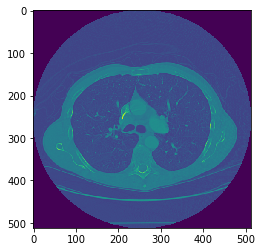

In [13]:
arr = path.pixel_array
def showImg(arr):
    plt.imshow(arr)
    plt.show()
showImg(arr)

In [14]:
mean = np.mean(arr)
std = np.std(arr)
standardized = (arr - mean)/std


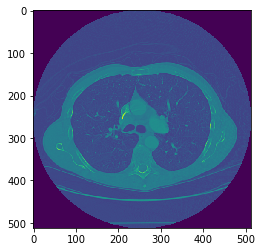

In [15]:
showImg(arr)

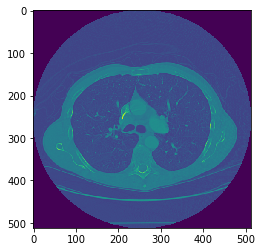

In [16]:
showImg(standardized)

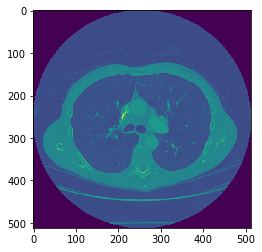

In [17]:
filtered = median_filter(standardized,size = 3)
showImg(filtered)

In [18]:
kmeans = KMeans(n_clusters=2).fit(np.reshape(filtered,[np.prod(filtered.shape),1]))
centers = sorted(kmeans.cluster_centers_.flatten())
centers

[-1.543601129883951, 0.4035182358281807]

-0.5700414470278852


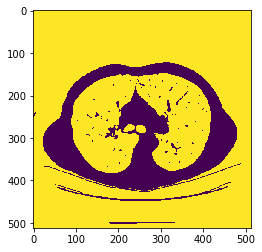

In [19]:
threshold = np.mean(centers)
print(threshold)
threshed = np.where(filtered<abs(threshold),1.0,0.0)
showImg(threshed)

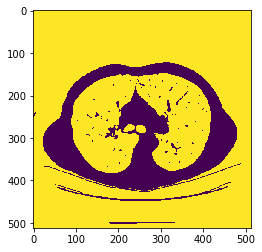

In [20]:
showImg(threshed)

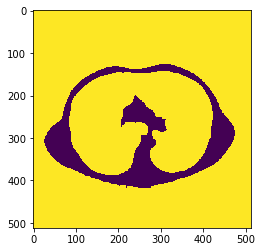

In [21]:
dialated = morphology.dilation(threshed,np.ones([10,10]))
showImg(dialated)


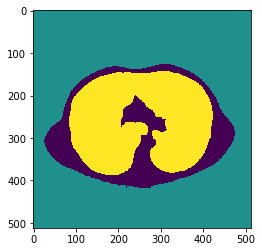

In [22]:
labels = measure.label(dialated)
showImg(labels)

In [23]:
label_vals = np.unique(labels)
regions = measure.regionprops(labels)
for region in regions:
    Box = region.bbox
    print(Box)

(0, 0, 512, 512)
(143, 84, 388, 422)


In [24]:
targets = []
for region in regions:
    Box = region.bbox
    if(Box[0]>40 and Box[2]<472 and Box[3]<475 and Box[2]- Box[0]<475 ):
        targets.append(region.label)
        
targets        

[2]

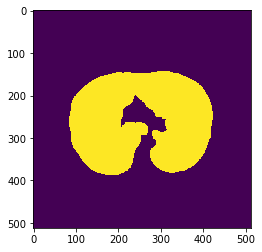

In [30]:
mask = np.zeros([512,512],dtype=np.int8)
for target in targets:
    mask = mask + np.where(labels== target,1,0)
#mask = morphology.dilation(mask,np.ones([10,10]))
showImg(mask)

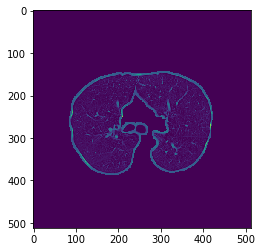

In [31]:
showImg(mask*arr)

In [32]:
from preprocessing import preprocess_image
img = preprocess_image(arr)

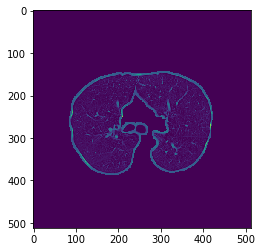

In [33]:
plt.imshow(img)

In [34]:
img.shape

(512, 512)

In [35]:
np.save("img",img)

In [37]:
img1 = np.load("img.npy")

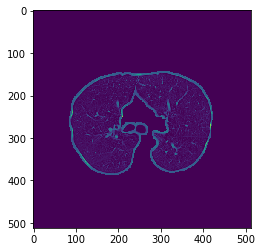

In [38]:
plt.imshow(img1)